#### A quick introduction to Decision Trees using Python

### Import Packages

In [1]:
# data processing
import numpy as np
import pandas as pd

# modeling
from sklearn.tree import DecisionTreeRegressor

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Simulate data

In [2]:
# let's simulate some data for this exercise
def simulate_linreg_data(rows):
    # set-up
    n_samples = rows
    np.random.seed(314)

    def true_fun(X):
        return -np.sin(2.2 * np.pi * X)

    # generate data
    x = np.sort(np.random.rand(n_samples))

    y = true_fun(x) + np.random.randn(n_samples) * 0.1
    
    return pd.DataFrame({'x': x, 'y': y})

df = simulate_linreg_data(20)

print(df.head())

          x         y
0  0.069914 -0.346400
1  0.122291 -0.636178
2  0.260480 -1.160382
3  0.260757 -1.036982
4  0.261531 -1.048191


### Plot data

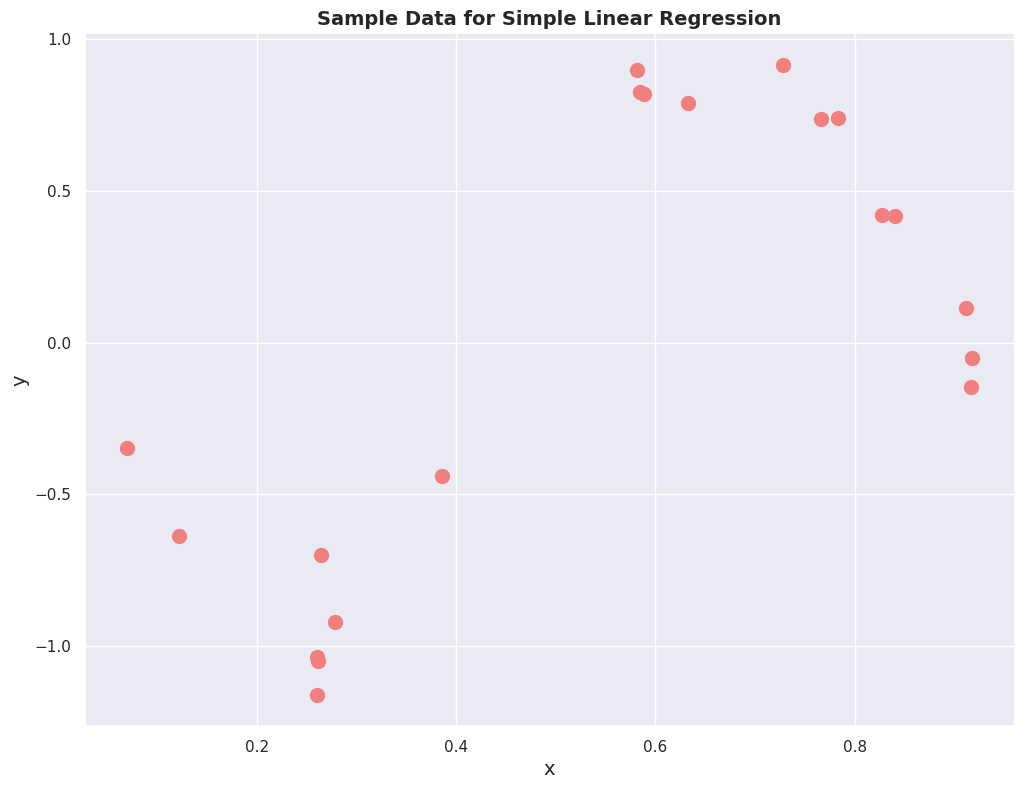

In [3]:
sns.set(style='darkgrid')

plt.figure().set_size_inches(12, 9)

plt.scatter(df.x, df.y, color='lightcoral', s=100)

plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Sample Data for Simple Linear Regression', fontsize=14, weight='semibold');

### Decision Tree

Step 1: Create a decision tree object.

In [4]:
# max leaf nodes
max_l = 3

dtree = DecisionTreeRegressor(max_leaf_nodes=max_l, random_state=314)

Step 2: Fit the model.

In [5]:
x = df.x.values.reshape(-1, 1)
y = df.y

In [6]:
dtree.fit(x, y)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=314)

Step 3: Make predictions.

In [7]:
y_hat = dtree.predict(x)
y_hat[:10]

array([-0.78597745, -0.78597745, -0.78597745, -0.78597745, -0.78597745,
       -0.78597745, -0.78597745, -0.78597745,  0.81886218,  0.81886218])

Plot the actuals vs. predicted values.

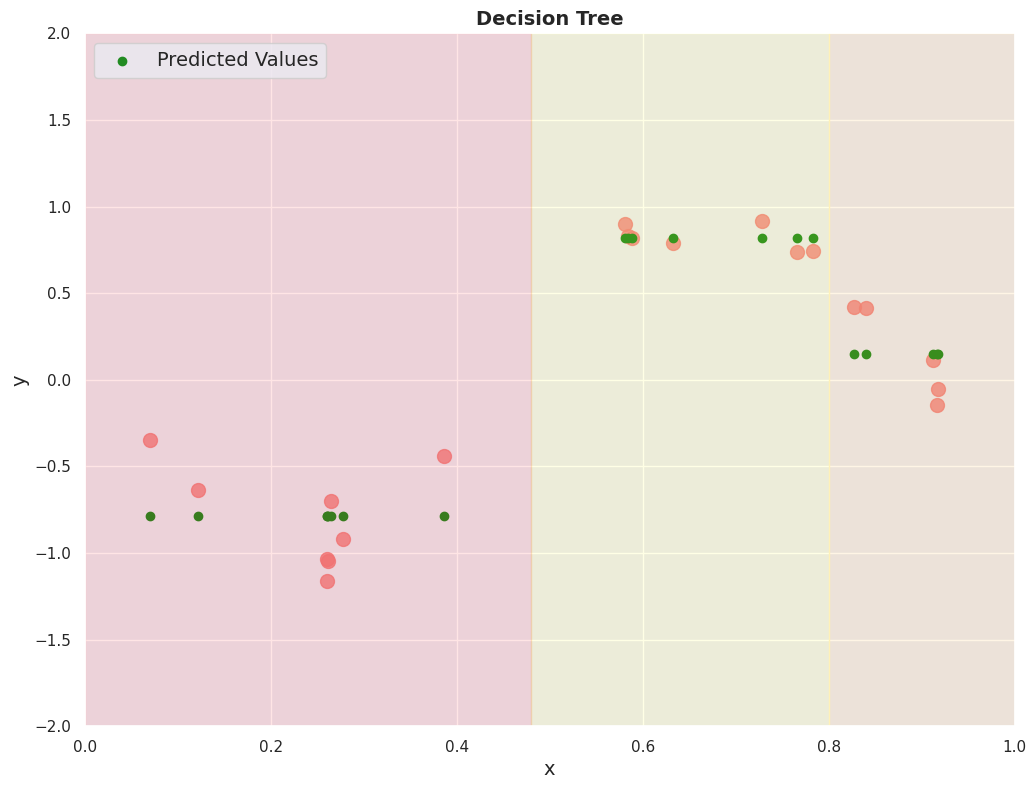

In [8]:
sns.set(style='darkgrid')
plt.figure().set_size_inches(12, 9)

plt.scatter(x, y, color='lightcoral', s=100, alpha=.8)
plt.scatter(x, y_hat, color='forestgreen', label=f'Predicted Values')

plt.axvspan(0, .48, alpha=0.1, color='red')
plt.axvspan(.48, .8, alpha=0.1, color='yellow')
plt.axvspan(0.8, 1, alpha=0.1, color='orange')

plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc='best', fontsize = 14)
plt.title('Decision Tree', fontsize=14, weight='semibold');

### Decision Tree model using Wine Quality data

In [9]:
df_wine = pd.read_csv(r'../data/winequality.csv', index_col=0)

# select the columns to be used as predictors in the model
num_cols = df_wine.columns[df_wine.dtypes == 'float64']

num_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [10]:
# model training data
X = df_wine[num_cols]
y = df_wine.quality

# define the model object with max depth of 5
dtree = DecisionTreeRegressor(max_depth=5, random_state=314)

# fit the model
dtree_wine = dtree.fit(X, y)

# make predictions
df_wine['preds'] = dtree_wine.predict(X)

# actuals vs. predicted values
df_wine[['preds', 'quality']].head()

,preds,quality
0,5.532751,6
1,5.532751,6
2,5.869565,6
3,5.802432,6
4,5.802432,6


Mean Squared Error (MSE)

In [11]:
from sklearn.metrics import mean_squared_error

mse_wine = mean_squared_error(y, df_wine.preds)

mse_wine

0.4910990241269476

[Scikit-learn Metrics and Scoring: Documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)

What happens if we build a model with the default settings...

In [12]:
dtree = DecisionTreeRegressor(random_state=314)

dtree_wine = dtree.fit(df_wine[num_cols], df_wine.quality)

df_wine['preds'] = dtree_wine.predict(df_wine[num_cols])

mean_squared_error(df_wine.quality, df_wine.preds)

0.0

Beware!

In [13]:
df_wine[['quality', 'preds']].head()

,quality,preds
0,6,6.0
1,6,6.0
2,6,6.0
3,6,6.0
4,6,6.0


In [14]:
# classification matrix
pd.crosstab(df_wine.quality, df_wine.preds)

preds,3.0,4.0,5.0,6.0,7.0,8.0,9.0
quality,,,,,,,
3,30,0,0,0,0,0,0
4,0,216,0,0,0,0,0
5,0,0,2138,0,0,0,0
6,0,0,0,2836,0,0,0
7,0,0,0,0,1079,0,0
8,0,0,0,0,0,193,0
9,0,0,0,0,0,0,5


In [15]:
# tree depth
dtree.get_depth()

27

In [16]:
len(dtree.tree_.value)

3431

There are as many as 61 leaf nodes in this model!

This is an example of over-fitting. Decision Tree is a _greedy_ algorithm, prone to over-fitting.

## *Exercise: Decision Tree model using House Prices data* 
[Data Source](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Step 1: Read data.

In [17]:
df_house = pd.read_csv(r'../data/house_prices.csv', index_col=0)

df_house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Step 2: Define `X` and `y` using the columns specified below.

In [18]:
cols_to_use = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
               'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
               'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 
               'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
               'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
               '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
               'YrSold']

target_col = 'SalePrice'

In [19]:
X = df_house[cols_to_use]

y = df_house['SalePrice']

X.shape, y.shape

((1460, 25), (1460,))

Step 3: Define a Decision Tree model object. Use `max_depth=5`.

In [20]:
dtree = DecisionTreeRegressor(max_depth=5, random_state=314)

Step 4: Train (fit) the model using `X` and `y`.

In [21]:
dtree_house = dtree.fit(X, y)

Step 5: Make predictions using the same (training) dataset `X`, and save those predictions in the `df_house` dataframe in a new column.

In [22]:
df_house['preds'] = dtree_house.predict(X)

Step 6: Find the correction between the predicted values and the actual target values.

In [23]:
df_house.preds.corr(df_house.SalePrice)

0.9250131531671374

Step 7: Calculate MSE.

In [24]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_house.SalePrice, df_house.preds)

mse

910389135.5666152

How does MSE compare to the mean value of the target?

In [25]:
y_mean = df_house.SalePrice.mean()

y_mean

180921.19589041095

In [26]:
mse**0.5 / y_mean

0.1667723634001809

### Feature Importance

In [27]:
importances = dtree.feature_importances_

importances[:10]

array([0.        , 0.00720944, 0.75710273, 0.        , 0.00564202,
       0.0064926 , 0.0592356 , 0.04229075, 0.        , 0.11134039])

In [28]:
indices = np.argsort(importances)[::-1]

indices[:5]

array([2, 9, 6, 7, 1])

In [29]:
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [30]:
# print the feature ranking
for f in range(X.shape[1]):
    imp = importances[indices[f]]
    col = X.columns[indices[f]]
    if imp > 0:
        print(f'#{f+1} {col}: {imp:.3f}')

#1 OverallQual: 0.757
#2 GrLivArea: 0.111
#3 1stFlrSF: 0.059
#4 2ndFlrSF: 0.042
#5 LotArea: 0.007
#6 Fireplaces: 0.007
#7 YearRemodAdd: 0.006
#8 YearBuilt: 0.006
#9 3SsnPorch: 0.004
#10 WoodDeckSF: 0.000


### splitting data into train and test partitions

A quick example to show how we can split the data for training and testing.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 25), (438, 25), (1022,), (438,))